In [22]:
# Подгружаем библиотеки
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn import decomposition
from sklearn import cluster

In [23]:
# загружаем файл
with open('vdc_color.pickle', 'rb') as file:
    file_new = pickle.load(file)

In [24]:
file_new.shape

(416314, 128)

In [25]:
# Уменьшаем размерность данных

pca = decomposition.PCA(n_components=2)
pca.fit(file_new)
pca_data = pca.transform(file_new)

In [6]:
# Строим модель. 
# Для того, чтобы найти оптимальное число кластеров, буду использовать локтевой метод
# сумму квадратов расстояний от точек до центроидов
d = []

for i in range(1, 11):
    k = cluster.KMeans(n_clusters=i, init='k-means++', random_state=17).fit(pca_data)
    d.append(k.inertia_)

Text(0, 0.5, 'Сумма расстояний до центридов')

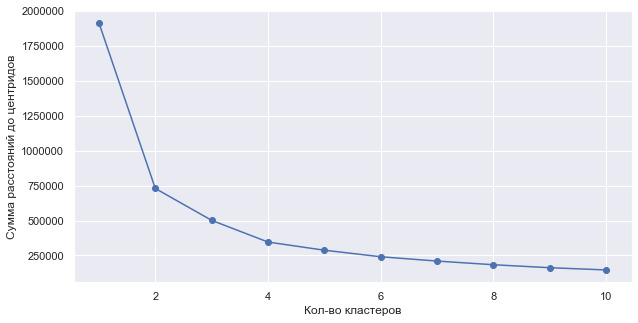

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), d, marker='o')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Сумма расстояний до центридов');

In [26]:
# Видим, что оптимальное количество кластеров 4

model = cluster.KMeans(n_clusters=4, init='k-means++', random_state=17)
y_model = model.fit_predict(pca_data)

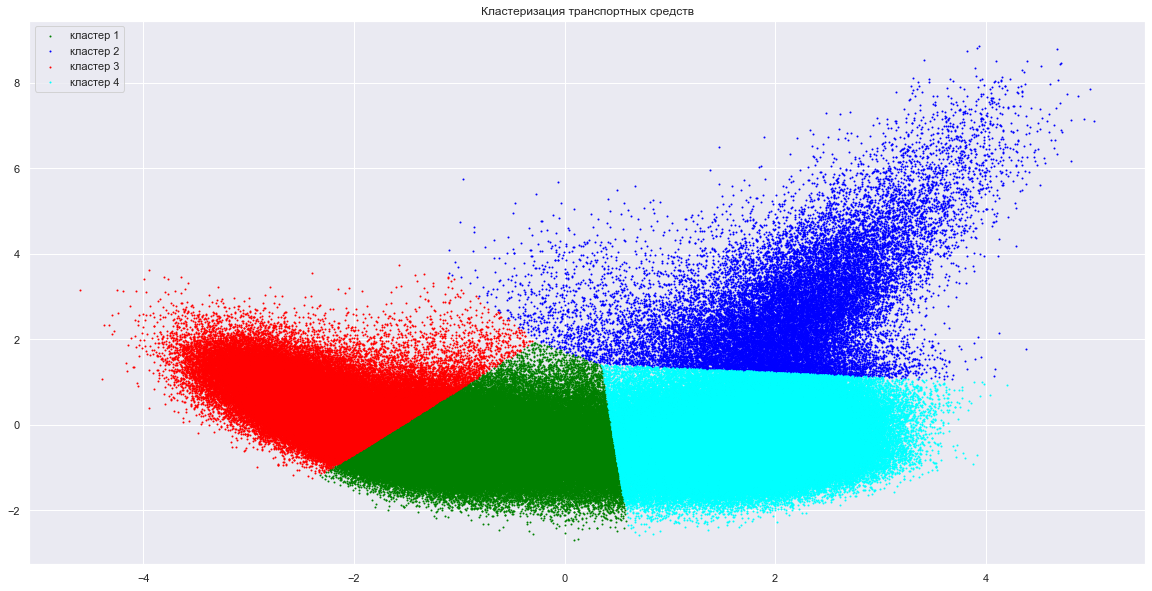

In [30]:
# Визуализируем модель

plt.figure(figsize=(20, 10))
plt.scatter(pca_data[y_model == 0, 0], pca_data[y_model == 0, 1], s=1, c='green', label='кластер 1')
plt.scatter(pca_data[y_model == 1, 0], pca_data[y_model == 1, 1], s=1, c='blue', label='кластер 2')
plt.scatter(pca_data[y_model == 2, 0], pca_data[y_model == 2, 1], s=1, c='red', label='кластер 3')
plt.scatter(pca_data[y_model == 3, 0], pca_data[y_model == 3, 1], s=1, c='cyan', label='кластер 4')
#plt.scatter(pca_data[y_model == 4, 0], pca_data[y_model == 4, 1], s=100, c='yellow', label='кластер 5')
plt.title('Кластеризация транспортных средств')
plt.legend();

In [31]:
# ищем выбросы
from sklearn.ensemble import IsolationForest
import numpy as np

clf = IsolationForest( behaviour = 'new', max_samples=1000000, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(pca_data)# -1 это выброс, 1 это нет
array_d = {}.fromkeys(preds, 0)
for a in preds:
    array_d[a] += 1

print(array_d)# смотрим сколько их получилось

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:288: UserWarning: max_samples (1000000) is greater than the total number of samples (416314). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))


{1: 389804, -1: 26510}


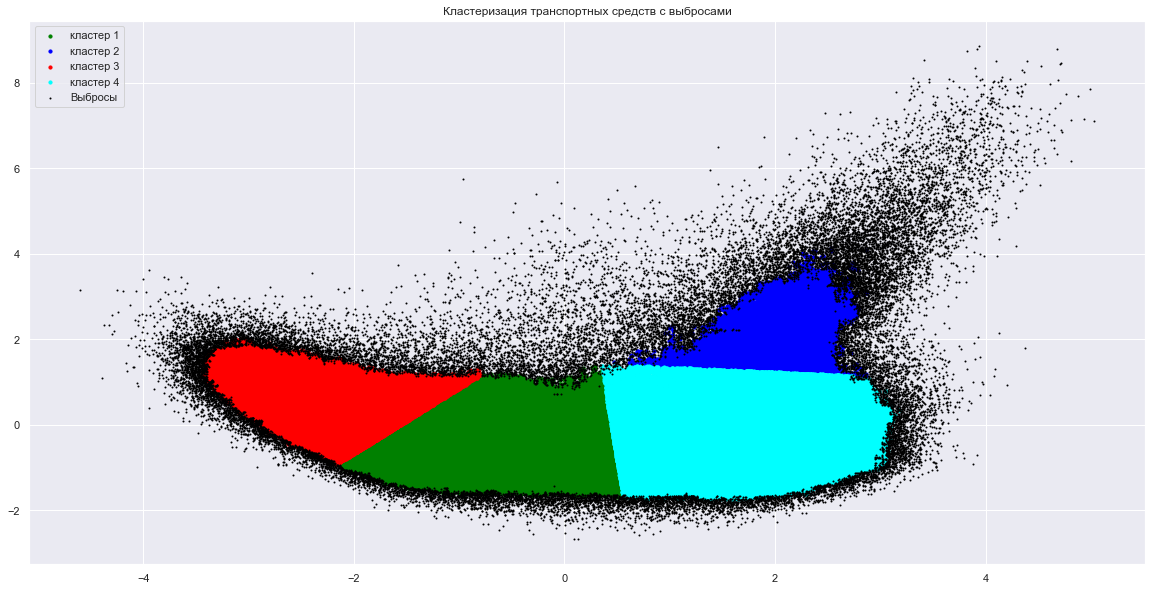

In [32]:
# Визуализируем модель с выбросами

plt.figure(figsize=(20, 10))
plt.scatter(pca_data[(y_model == 0)&(preds == 1), 0], pca_data[(y_model == 0)&(preds == 1), 1], s=10, c='green', label='кластер 1')
plt.scatter(pca_data[(y_model == 1)&(preds == 1), 0], pca_data[(y_model == 1)&(preds == 1), 1], s=10, c='blue', label='кластер 2')
plt.scatter(pca_data[(y_model == 2)&(preds == 1), 0], pca_data[(y_model == 2)&(preds == 1), 1], s=10, c='red', label='кластер 3')
plt.scatter(pca_data[(y_model == 3)&(preds == 1), 0], pca_data[(y_model == 3)&(preds == 1), 1], s=10, c='cyan', label='кластер 4')
plt.scatter(pca_data[preds == -1, 0], pca_data[preds == -1, 1], s=1, c='black', label='Выбросы')
#plt.scatter(pca_data[y_model == 5, 0], pca_data[y_model == 5, 1], s=100, c='white', label='кластер 4')
#plt.scatter(pca_data[y_model == 4, 0], pca_data[y_model == 4, 1], s=100, c='yellow', label='кластер 5')
plt.title('Кластеризация транспортных средств с выбросами')
plt.legend();

In [33]:
# Смотрим 2 метрики
import sklearn
print (sklearn.metrics.calinski_harabasz_score(pca_data, y_model))
sklearn.metrics.davies_bouldin_score(pca_data, y_model)

628461.8949053537


0.7395288682386572

In [34]:
import numpy as np
import pandas as pd




# берем структуру из заранее подготовленного файла
batch = pd.read_excel('id.xlsx')
batch['cluster'] = y_model # добавляем в нее результат кластеризации
batch['outlier'] = preds
batch.to_excel('predictions_cluster_color_2dim.xlsx', index=False) # записываем результат на диск


In [35]:
# выводим первые 60 результатов, что бы сравнить с картинками
batch[['batch_id','id','cluster','outlier']].head(60)

batch_id  id  cluster  outlier
0          1   1        2        1
1          1   2        2        1
2          1   3        2        1
3          1   4        2        1
4          1   5        2        1
5          1   6        2        1
6          2   7        0        1
7          2   8        0        1
8          2   9        0        1
9          2  10        0        1
10         2  11        0        1
11         3  12        3        1
12         3  13        3        1
13         3  14        3        1
14         3  15        3        1
15         4  16        3        1
16         4  17        3        1
17         4  18        3        1
18         4  19        3        1
19         4  20        3        1
20         5  21        3        1
21         5  22        3        1
22         5  23        3        1
23         5  24        3        1
24         5  25        3        1
25         5  26        3        1
26         5  27        3        1
27         5  28        3        1
28         5  29        3        1
29         6  30        0        1
30         6  31        2        1
31         6  32        2        1
32         6  33        2        1
33         6  34        2        1
34         6  35        2        1
35         6  36        2        1
36         6  37        2       -1
37         6  38        2        1
38         6  39        2        1
39         6  40        2        1
40         6  41        2        1
41         6  42        2        1
42         6  43        2        1
43         6  44        2        1
44         6  45        2        1
45         6  46        2        1
46         6  47        2        1
47         6  48        0       -1
48         6  49        2        1
49         6  50        0        1
50         7  51        0        1
51         7  52        0        1
52         7  53        0        1
53         7  54        0        1
54         8  55        2        1
55         8  56        2        1
56         8  57        0        1
57         8  58        2        1
58         8  59        2        1
59         9  60        1       -1

### Что получиться если сжимать через TSNE?

In [36]:
#Загружаем TSNE 2d
## загружаем файл
with open('vdc_color_2_TSNE.pickle', 'rb') as file:
    file_new = pickle.load(file)

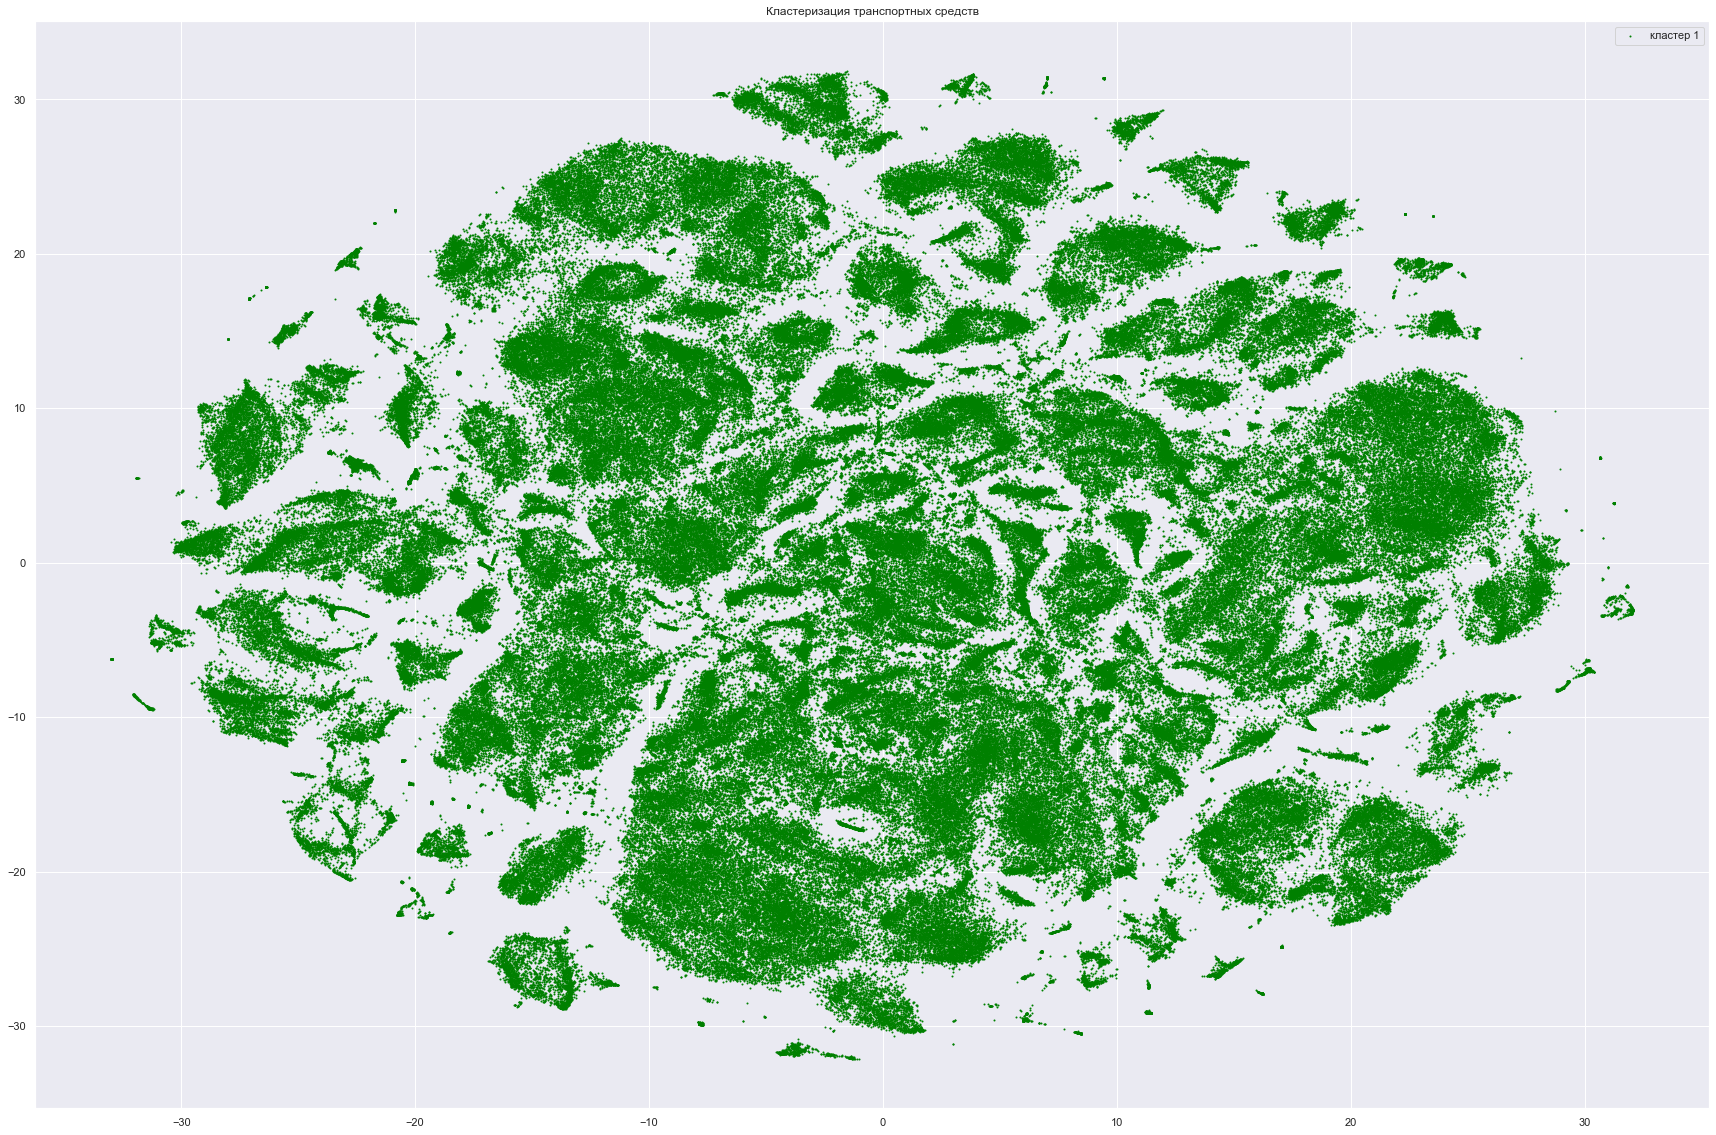

In [37]:
plt.figure(figsize=(30, 20))
plt.scatter(file_new[:, 0], file_new[:, 1], s=1, c='green', label='кластер 1')

#plt.scatter(pca_data[y_model == 4, 0], pca_data[y_model == 4, 1], s=100, c='yellow', label='кластер 5')
plt.title('Кластеризация транспортных средств')
plt.legend();

In [38]:
# ищем выбросы
from sklearn.ensemble import IsolationForest
import numpy as np

clf = IsolationForest( behaviour = 'new', max_samples=1000000, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(file_new)# -1 это выброс, 1 это нет
array_d = {}.fromkeys(preds, 0)
for a in preds:
    array_d[a] += 1

print(array_d)# смотрим сколько их получилось

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:288: UserWarning: max_samples (1000000) is greater than the total number of samples (416314). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))


{1: 357908, -1: 58406}


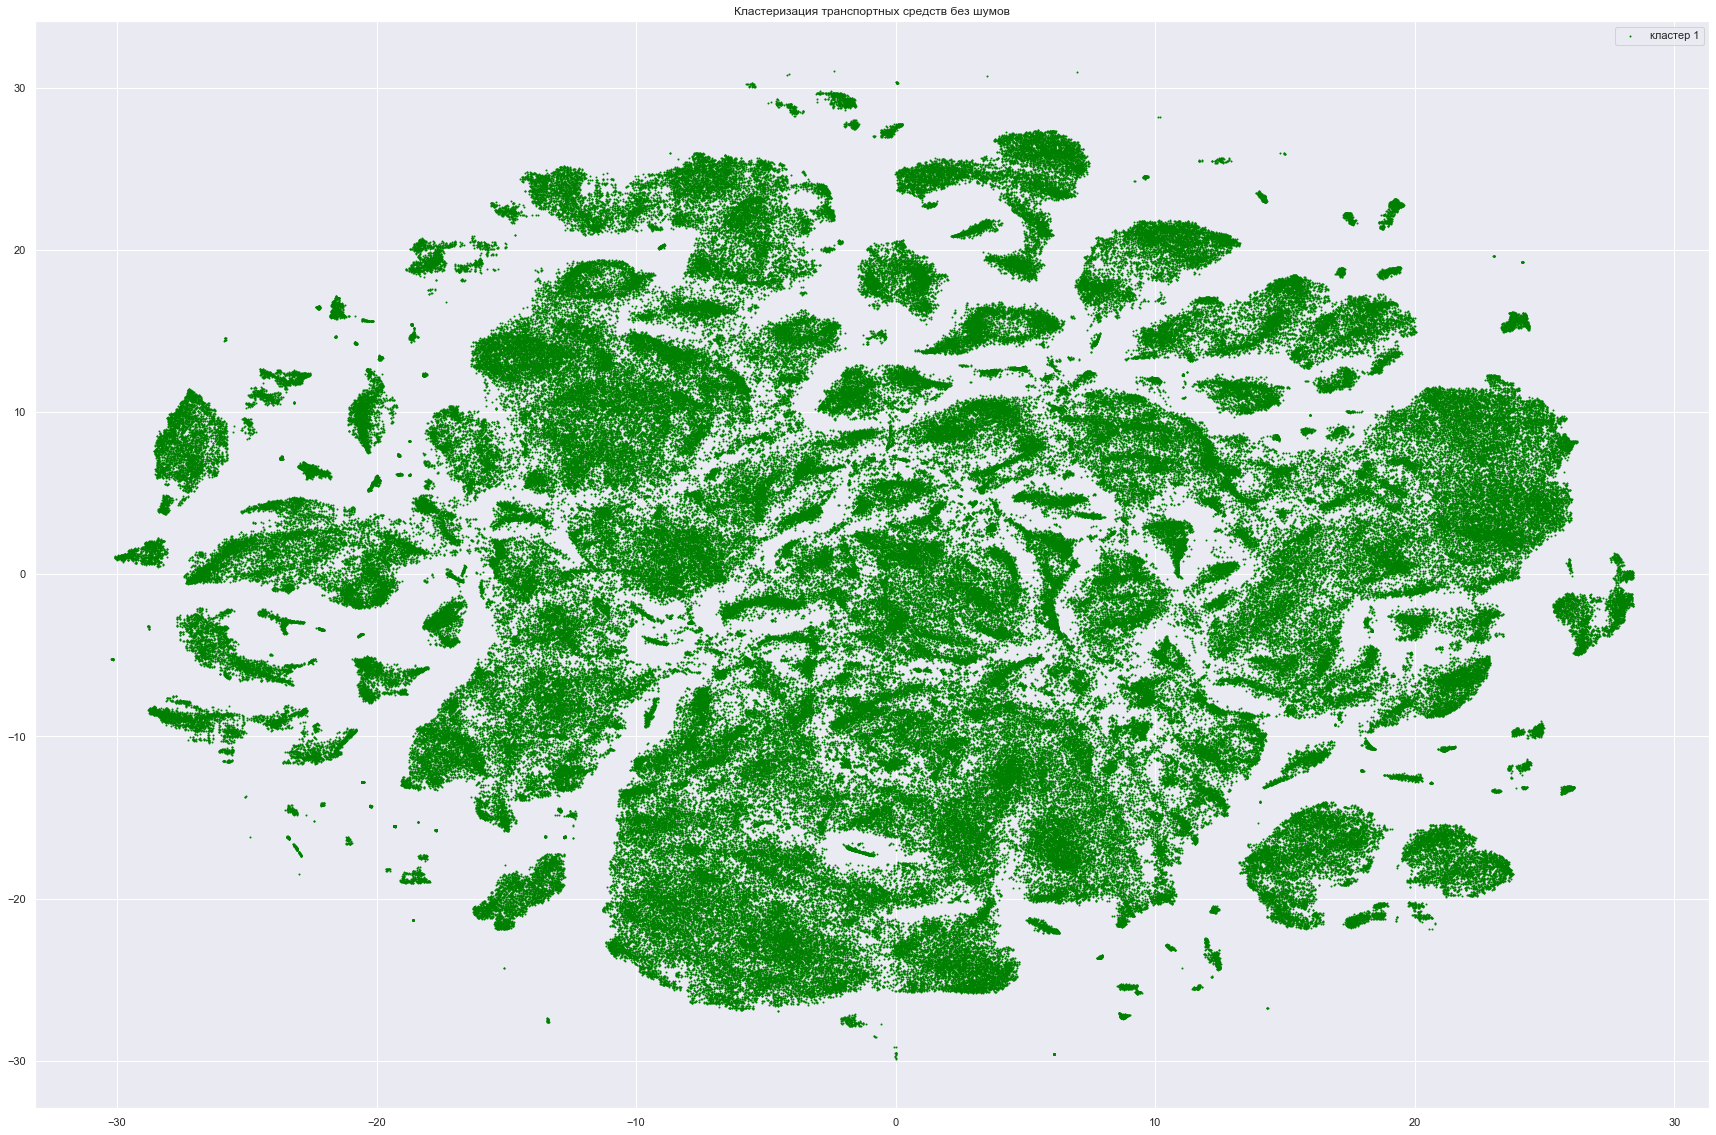

In [40]:
plt.figure(figsize=(30, 20))
plt.scatter(file_new[preds == 1, 0], file_new[preds == 1, 1], s=1, c='green', label='кластер 1')

#plt.scatter(pca_data[y_model == 4, 0], pca_data[y_model == 4, 1], s=100, c='yellow', label='кластер 5')
plt.title('Кластеризация транспортных средств без шумов')
plt.legend();

In [30]:
## Строим модель. 
##Для того, чтобы найти оптимальное число кластеров, буду использовать локтевой метод
##сумму квадратов расстояний от точек до центроидов
d = []

for i in range(3, 15):
    k = cluster.KMeans(n_clusters=i, init='k-means++', random_state=17).fit(file_new)
    d.append(k.inertia_)

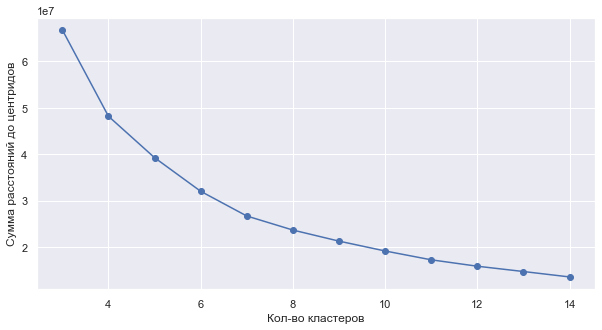

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(range(3, 15), d, marker='o')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Сумма расстояний до центридов');

In [41]:
## Видим, что оптимальное количество кластеров 4

model = cluster.KMeans(n_clusters=7, init='k-means++', random_state=17)
y_model = model.fit_predict(file_new)
# Смотрим 2 метрики
import sklearn
print (sklearn.metrics.calinski_harabasz_score(file_new, y_model))
sklearn.metrics.davies_bouldin_score(file_new, y_model)

362970.8076484513


0.7699180880746079

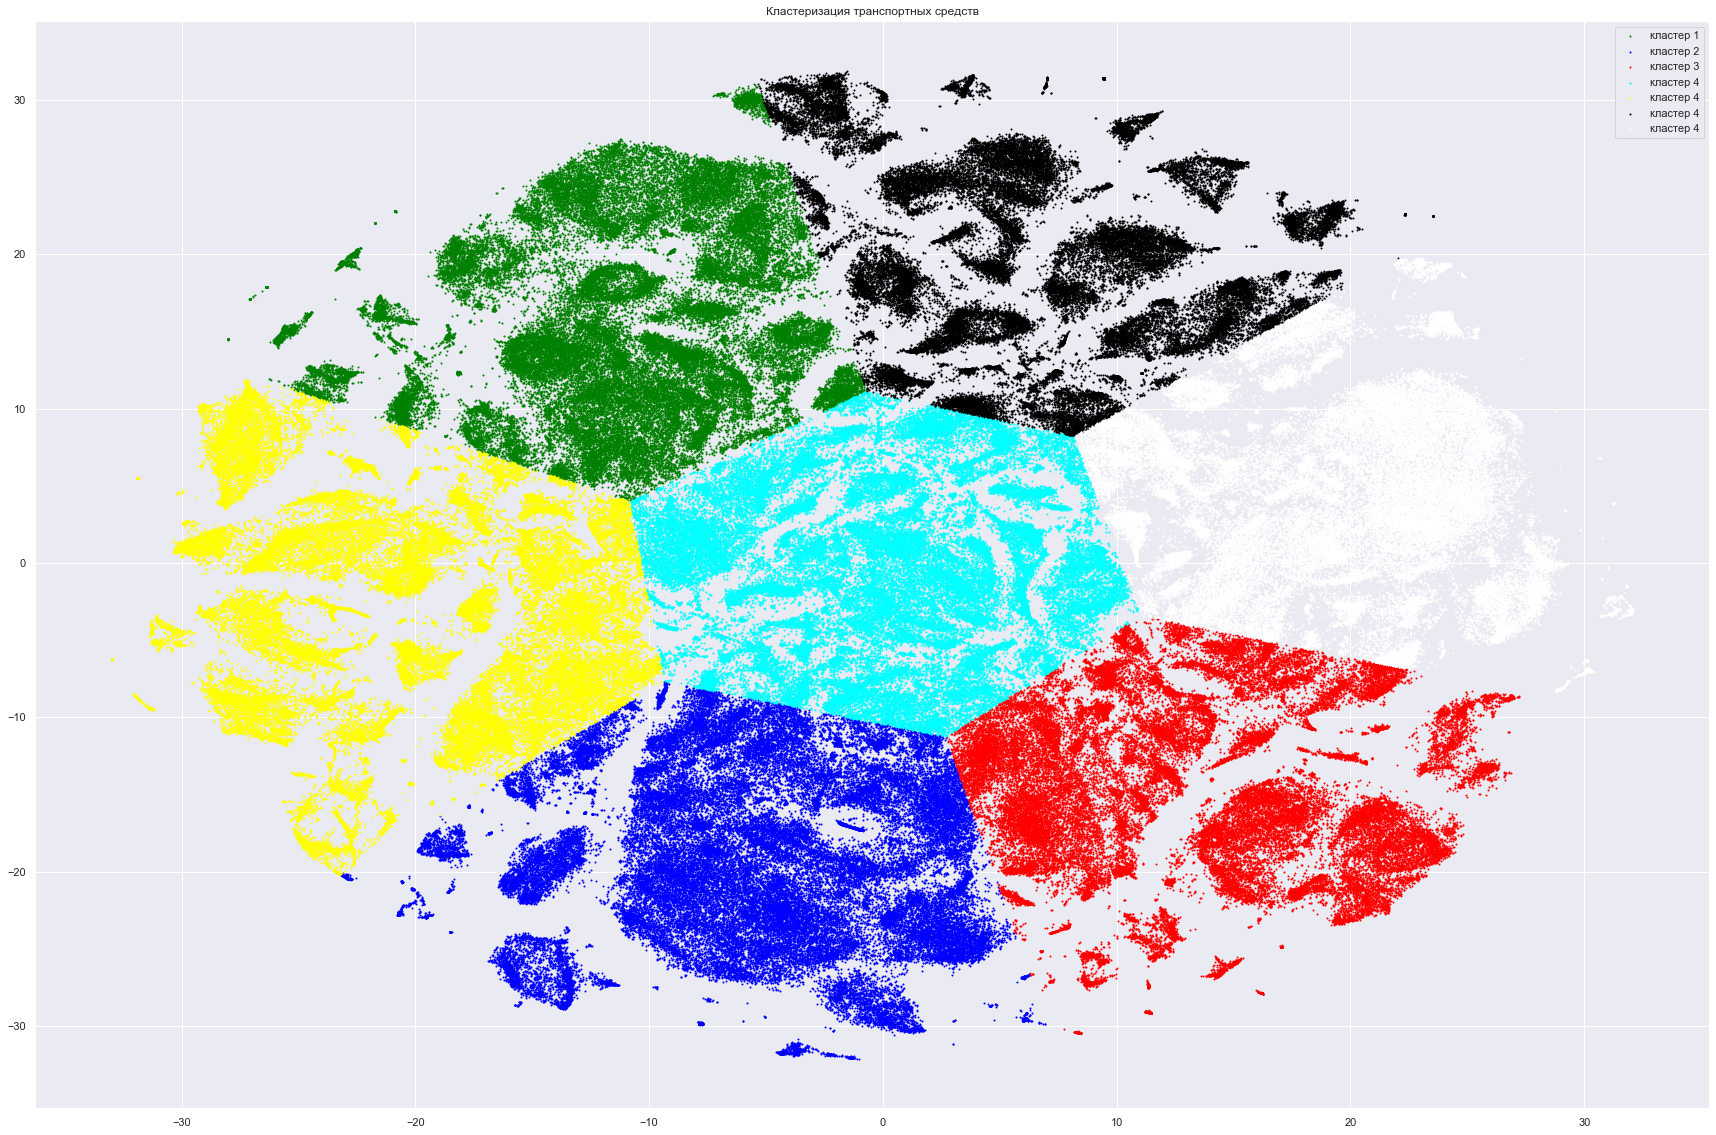

In [40]:
## Визуализируем модель

plt.figure(figsize=(30, 20))
plt.scatter(file_new[y_model == 0, 0], file_new[y_model == 0, 1], s=1, c='green', label='кластер 1')
plt.scatter(file_new[y_model == 1, 0], file_new[y_model == 1, 1], s=1, c='blue', label='кластер 2')
plt.scatter(file_new[y_model == 2, 0], file_new[y_model == 2, 1], s=1, c='red', label='кластер 3')
plt.scatter(file_new[y_model == 3, 0], file_new[y_model == 3, 1], s=1, c='cyan', label='кластер 4')
plt.scatter(file_new[y_model == 4, 0], file_new[y_model == 4, 1], s=1, c='yellow', label='кластер 4')
plt.scatter(file_new[y_model == 5, 0], file_new[y_model == 5, 1], s=1, c='black', label='кластер 4')
plt.scatter(file_new[y_model == 6, 0], file_new[y_model == 6, 1], s=1, c='white', label='кластер 4')

#plt.scatter(pca_data[y_model == 4, 0], pca_data[y_model == 4, 1], s=100, c='yellow', label='кластер 5')
plt.title('Кластеризация транспортных средств')
plt.legend();

In [43]:

# берем структуру из заранее подготовленного файла
batch_tsne = pd.read_excel('id.xlsx')
batch_tsne['cluster'] = y_model # добавляем в нее результат кластеризации
batch_tsne['outlier'] = preds
batch_tsne.to_excel('predictions_cluster_color_2dim_tsne.xlsx', index=False) # записываем результат на диск
# выводим первые 60 результатов, что бы сравнить с картинками
batch_tsne[['batch_id','id','cluster','outlier']].head(60)

batch_id  id  cluster  outlier
0          1   1        5        1
1          1   2        5        1
2          1   3        0        1
3          1   4        5        1
4          1   5        0        1
5          1   6        0       -1
6          2   7        1        1
7          2   8        3        1
8          2   9        3        1
9          2  10        3        1
10         2  11        2        1
11         3  12        0       -1
12         3  13        6        1
13         3  14        6        1
14         3  15        6        1
15         4  16        0        1
16         4  17        6        1
17         4  18        2       -1
18         4  19        0        1
19         4  20        5        1
20         5  21        6        1
21         5  22        6        1
22         5  23        6        1
23         5  24        3        1
24         5  25        3        1
25         5  26        3        1
26         5  27        6        1
27         5  28        6       -1
28         5  29        6        1
29         6  30        1        1
30         6  31        1        1
31         6  32        1        1
32         6  33        1       -1
33         6  34        1        1
34         6  35        2        1
35         6  36        1        1
36         6  37        2        1
37         6  38        1        1
38         6  39        3        1
39         6  40        1        1
40         6  41        1        1
41         6  42        1        1
42         6  43        1        1
43         6  44        1        1
44         6  45        1        1
45         6  46        1        1
46         6  47        1        1
47         6  48        1        1
48         6  49        1        1
49         6  50        1        1
50         7  51        2        1
51         7  52        3        1
52         7  53        3        1
53         7  54        3        1
54         8  55        5        1
55         8  56        5       -1
56         8  57        2        1
57         8  58        5        1
58         8  59        1        1
59         9  60        5       -1